# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
if not os.path.exists('lut.py'):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

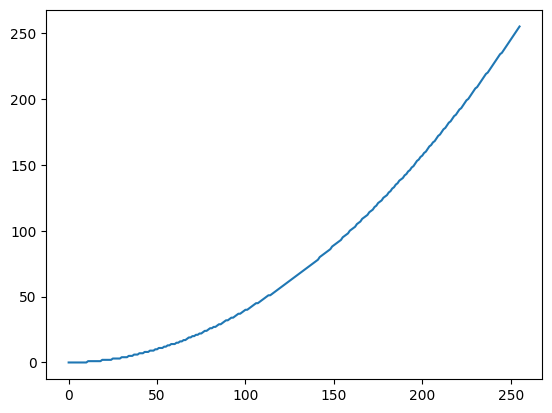

In [3]:
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

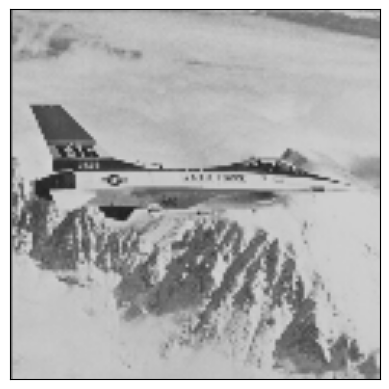

In [4]:
if not os.path.exists('jet.bmp'):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

image = cv2.imread('jet.bmp')
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()


Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

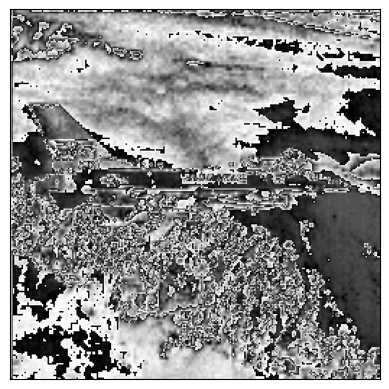

In [5]:
image = cv2.LUT(image, lut.pila)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [6]:
def LUT(im, table):
    image = cv2.imread(im)
    fig1, (pl, org, tab) = plt.subplots(1, 3, figsize=(12, 4))
    pl.plot(table)
    org.imshow(image)
    image = cv2.LUT(image, table)
    tab.imshow(image)
    pl.set(xticks=[], yticks=[])
    pl.set_title('Wykres przekodowania')
    org.set(xticks=[], yticks=[])
    org.set_title('Obraz oryginalny')
    tab.set(xticks=[], yticks=[])
    tab.set_title('Obraz przekształcony')


Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

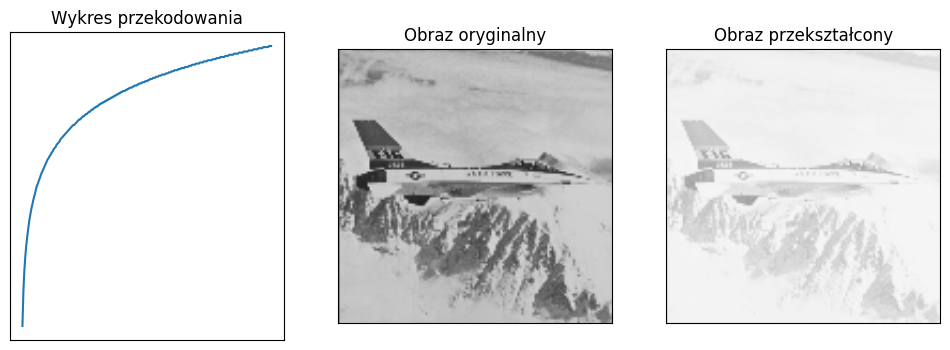

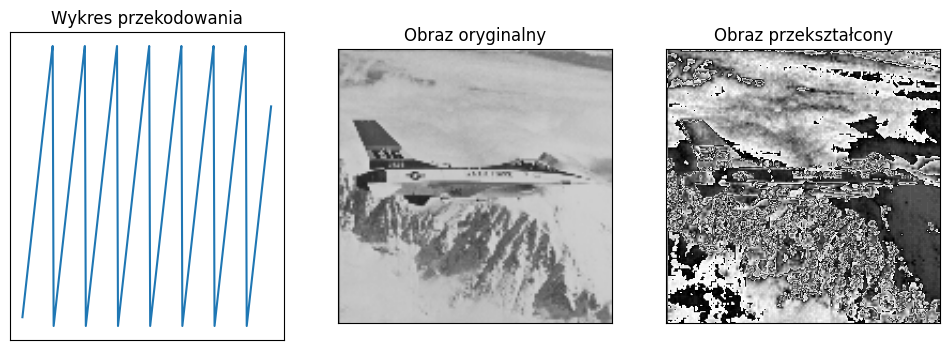

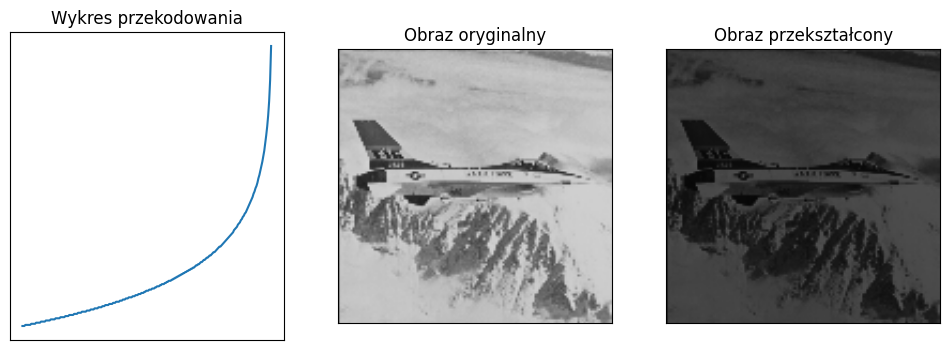

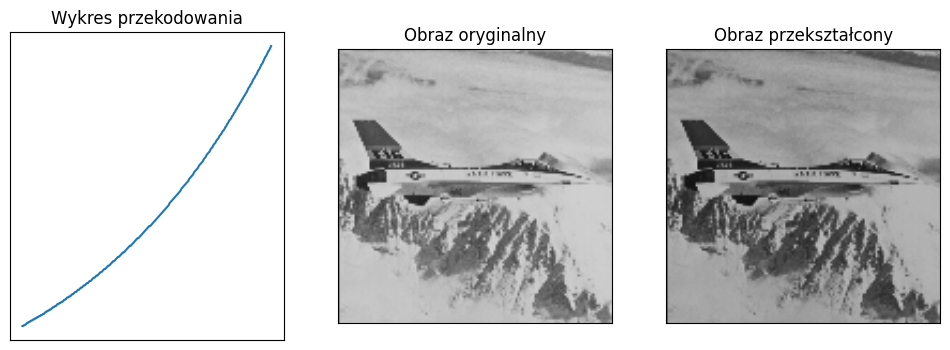

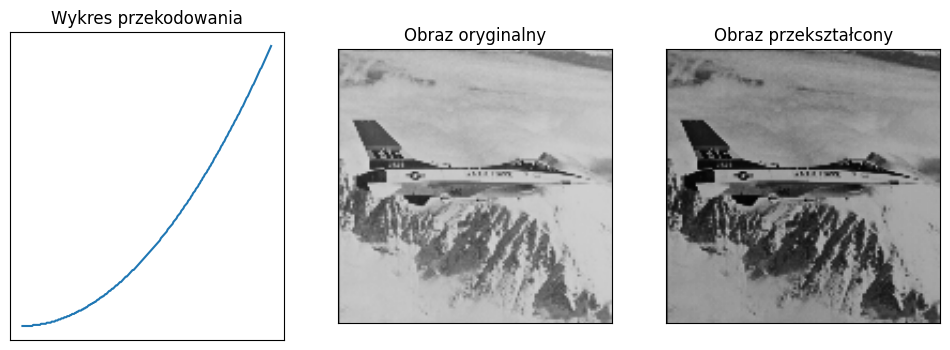

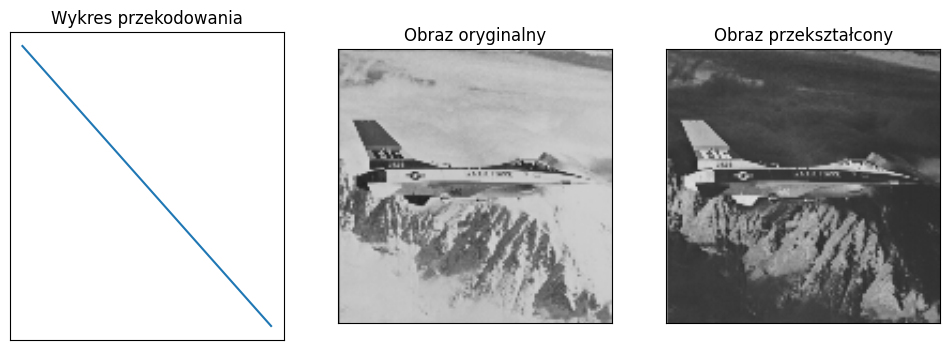

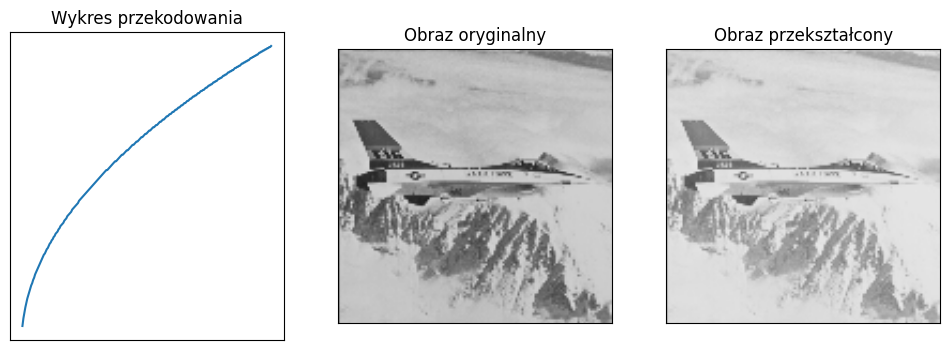

In [7]:
LUT('jet.bmp', lut.log)
LUT('jet.bmp', lut.pila)
LUT('jet.bmp', lut.odwlog)
LUT('jet.bmp', lut.wykladnicza)
LUT('jet.bmp', lut.kwadratowa)
LUT('jet.bmp', lut.odwrotna)
LUT('jet.bmp', lut.pierwiastkowa)


## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

[[], []]

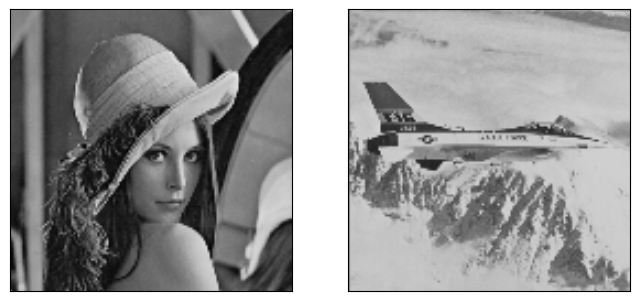

In [8]:
if not os.path.exists('jet.bmp'):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

if not os.path.exists('lena.bmp'):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

jet = cv2.imread('jet.bmp')
lena = cv2.imread('lena.bmp')

fig1, (l, j) = plt.subplots(1, 2, figsize=(8, 4))
l.imshow(lena)
l.set(xticks=[], yticks=[])
j.imshow(jet)
j.set(xticks=[], yticks=[])


Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

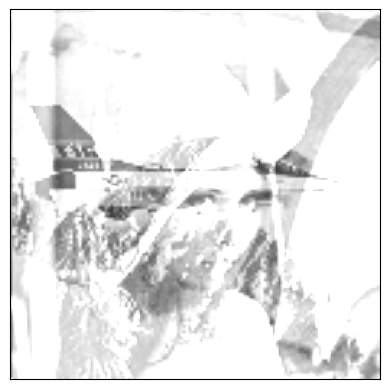

In [9]:
sum8 = cv2.add(jet, lena)
plt.imshow(sum8)
plt.xticks([])
plt.yticks([])
plt.show()


Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

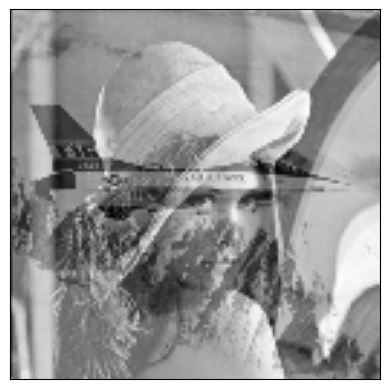

In [10]:
jet16 = jet.astype('uint16')
lena16 = lena.astype('uint16')

sum16 = cv2.add(jet16, lena16)

sum16_norm = cv2.normalize(sum16, sum16, 0, 255, cv2.NORM_MINMAX)
plt.imshow(sum16_norm)
plt.xticks([])
plt.yticks([])
plt.show()


### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

[[], []]

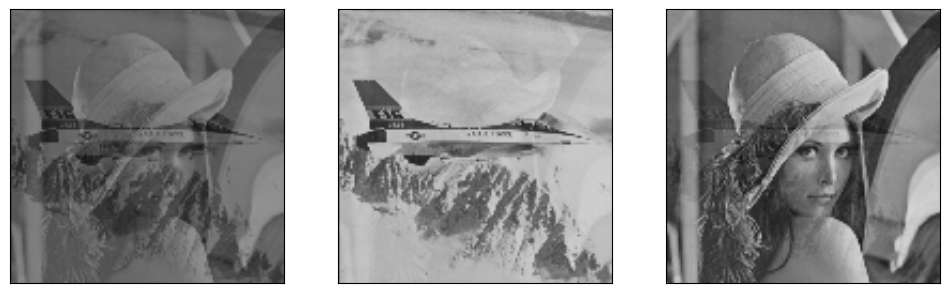

In [11]:
w1 = cv2.addWeighted(lena, 0.3, jet, 0.4, 0)
w2 = cv2.addWeighted(lena, 0.1, jet, 0.9, 0)
w3 = cv2.addWeighted(lena, 0.8, jet, 0.2, 0)

fig2, (x, y, z) = plt.subplots(1, 3, figsize=(12, 4))
x.imshow(w1)
x.set(xticks=[], yticks=[])
y.imshow(w2)
y.set(xticks=[], yticks=[])
z.imshow(w3)
z.set(xticks=[], yticks=[])

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

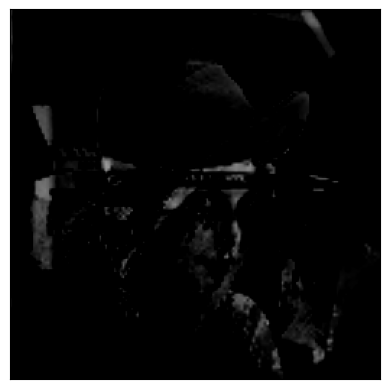

In [12]:
sub8 = cv2.subtract(lena, jet)
plt.imshow(sub8)
plt.xticks([])
plt.yticks([])
plt.show()


Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

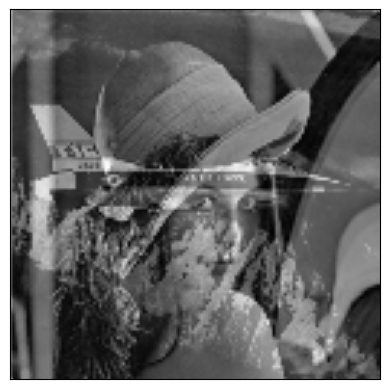

In [13]:
jet16 = jet.astype('int16')
lena16 = lena.astype('int16')

sub16 = cv2.subtract(lena16, jet16)

sub16_norm = cv2.normalize(sub16, sub16, 0, 255, cv2.NORM_MINMAX)
sub16_abs = np.abs(sub16_norm)
plt.imshow(sub16_abs)
plt.xticks([])
plt.yticks([])
plt.show()


### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

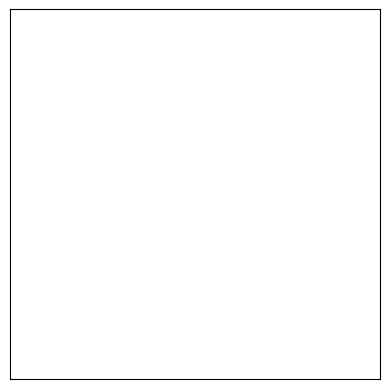

In [14]:
mul = cv2.multiply(lena, jet)
plt.imshow(mul)
plt.xticks([])
plt.yticks([])
plt.show()


Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

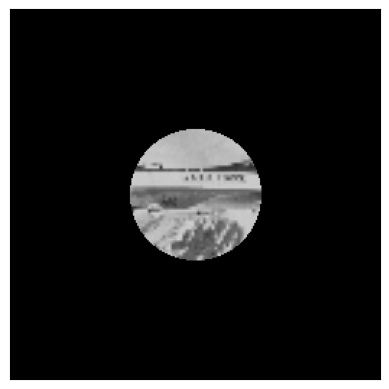

In [15]:
if not os.path.exists('kolo.bmp'):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

maska = cv2.imread('kolo.bmp')
maska = (maska).astype('bool').astype('uint8')

masked = cv2.multiply(jet, maska)
plt.imshow(masked)
plt.xticks([])
plt.yticks([])
plt.show()


### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

[[], []]

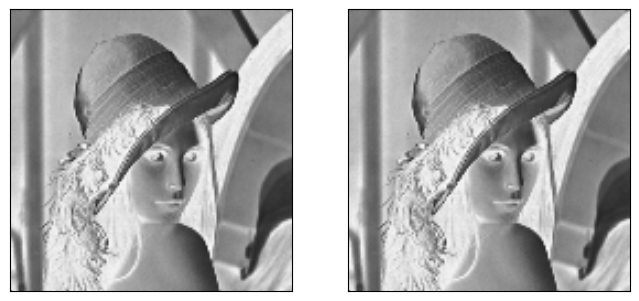

In [16]:
lena_lut = cv2.LUT(lena, lut.odwrotna)
lena_neg = cv2.bitwise_not(lena)

fig3, (ll, jn) = plt.subplots(1, 2, figsize=(8, 4))
ll.imshow(lena_lut)
ll.set(xticks=[], yticks=[])
jn.imshow(lena_neg)
jn.set(xticks=[], yticks=[])

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

[[], []]

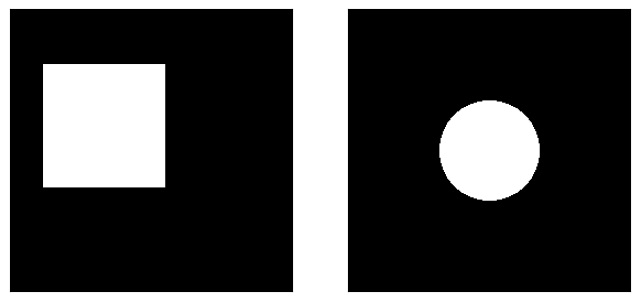

In [17]:
if not os.path.exists('kolo.bmp'):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

if not os.path.exists('kwadrat.bmp'):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

kwadrat = cv2.imread('kwadrat.bmp')
kolo = cv2.imread('kolo.bmp')

fig4, (kw, kol) = plt.subplots(1, 2, figsize=(8, 4))
kw.imshow(kwadrat)
kw.set(xticks=[], yticks=[])
kol.imshow(kolo)
kol.set(xticks=[], yticks=[])


Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

Text(0.5, 1.0, 'Operacja XOR')

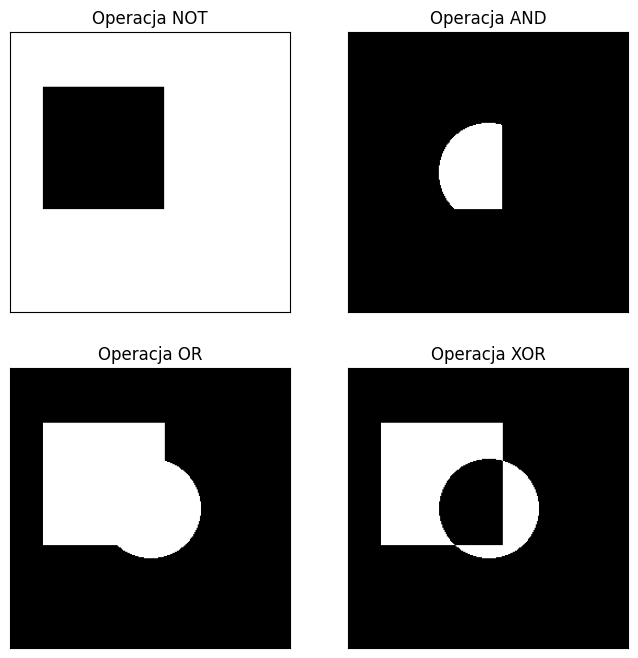

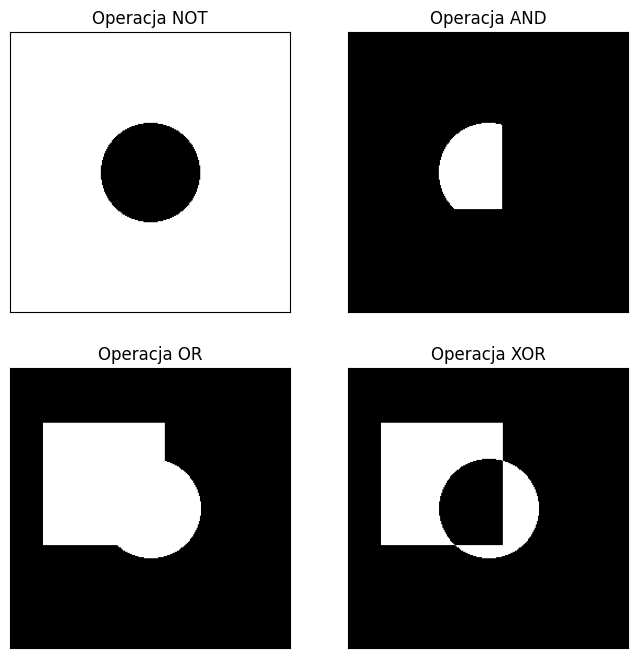

In [18]:
nott = cv2.bitwise_not(kwadrat)
andd = cv2.bitwise_and(kwadrat, kolo)
orr = cv2.bitwise_or(kwadrat, kolo)
xorr = cv2.bitwise_xor(kwadrat, kolo)

fig4, ((n, a), (o, x)) = plt.subplots(2, 2, figsize=(8, 8))
n.imshow(nott)
n.set(xticks=[], yticks=[])

a.imshow(andd)
a.set(xticks=[], yticks=[])

o.imshow(orr)
o.set(xticks=[], yticks=[])

x.imshow(xorr)
x.set(xticks=[], yticks=[])

n.set_title('Operacja NOT')
a.set_title('Operacja AND')
o.set_title('Operacja OR')
x.set_title('Operacja XOR')

nott = cv2.bitwise_not(kolo)
andd = cv2.bitwise_and(kolo, kwadrat)
orr = cv2.bitwise_or(kolo, kwadrat)
xorr = cv2.bitwise_xor(kolo, kwadrat)

fig5, ((n, a), (o, x)) = plt.subplots(2, 2, figsize=(8, 8))
n.imshow(nott)
n.set(xticks=[], yticks=[])

a.imshow(andd)
a.set(xticks=[], yticks=[])

o.imshow(orr)
o.set(xticks=[], yticks=[])

x.imshow(xorr)
x.set(xticks=[], yticks=[])

n.set_title('Operacja NOT')
a.set_title('Operacja AND')
o.set_title('Operacja OR')
x.set_title('Operacja XOR')
